In [37]:
import os, shutil
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [16]:
original_dataset_dir = '../data/kaggle_original_data'
dir = '../data/cats_and_dogs/'

if not os.path.exists(dir):
    os.mkdir(dir)

base_dir = os.path.join(dir, 'cats_and_dogs_small')

if not os.path.exists(base_dir):
    os.mkdir(base_dir)

In [17]:
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

In [18]:
fname_train_cat = ['cat.{}.jpg'.format(i) for i in range(1000)]
for i in fname_train_cat:
    src = os.path.join(original_dataset_dir, i)
    destination = os.path.join(train_cats_dir, i)
    shutil.copyfile(src, destination)

fname_val_cat = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for i in fname_val_cat:
    src = os.path.join(original_dataset_dir, i)
    destination = os.path.join(validation_cats_dir, i)
    shutil.copyfile(src, destination)

fname_test_cat = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for i in fname_test_cat:
    src = os.path.join(original_dataset_dir, i)
    destination = os.path.join(test_cats_dir, i)
    shutil.copyfile(src, destination)

fname_train_dog = ['dog.{}.jpg'.format(i) for i in range(1000)]
for i in fname_train_dog:
    src = os.path.join(original_dataset_dir, i)
    destination = os.path.join(train_dogs_dir, i)
    shutil.copyfile(src, destination)

fname_val_dog = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for i in fname_val_dog:
    src = os.path.join(original_dataset_dir, i)
    destination = os.path.join(validation_dogs_dir, i)
    shutil.copyfile(src, destination)

fname_test_dog = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for i in fname_test_dog:
    src = os.path.join(original_dataset_dir, i)
    destination = os.path.join(test_dogs_dir, i)
    shutil.copyfile(src, destination)


In [19]:
print('total train cat images:', len(os.listdir(train_cats_dir)))
print('total validate cat images:', len(os.listdir(validation_cats_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total train dog images:', len(os.listdir(train_dogs_dir)))
print('total validate dog images:', len(os.listdir(validation_dogs_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total train cat images: 1000
total validate cat images: 500
total test cat images: 500
total train dog images: 1000
total validate dog images: 500
total test dog images: 500


In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
______

In [23]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [26]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  #目标目录
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


In [28]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=128,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('../models/cats_and_dogs/cats_and_dogs_small_1.h5')


Epoch 1/30
128/128 [==============================] - 72s 565ms/step - loss: 0.6771 - acc: 0.5608 - val_loss: 0.6464 - val_acc: 0.6358

/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  from ipykernel import kernelapp as app
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: color is redundantly defined by the 'color

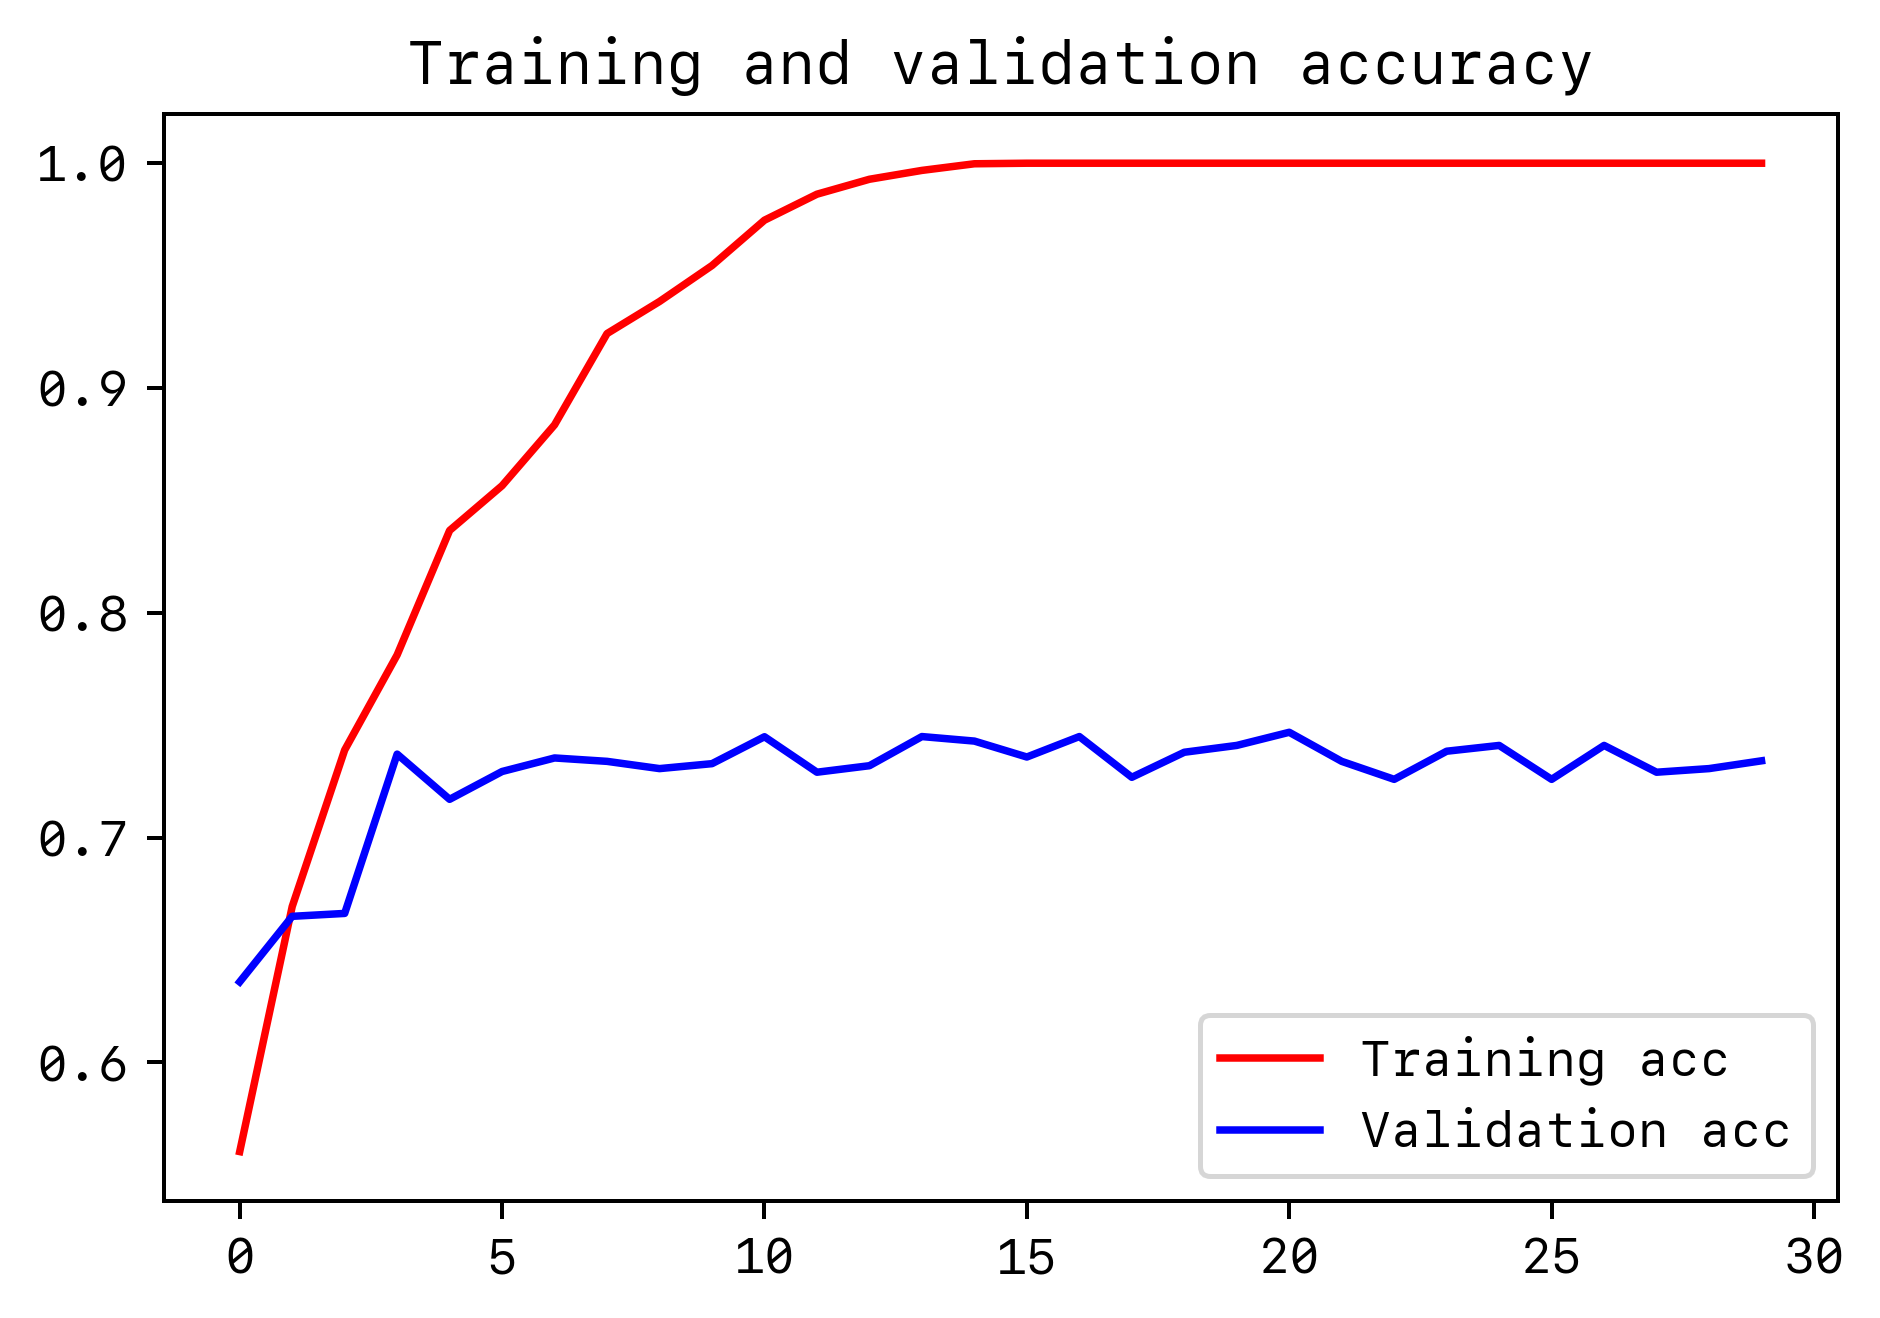

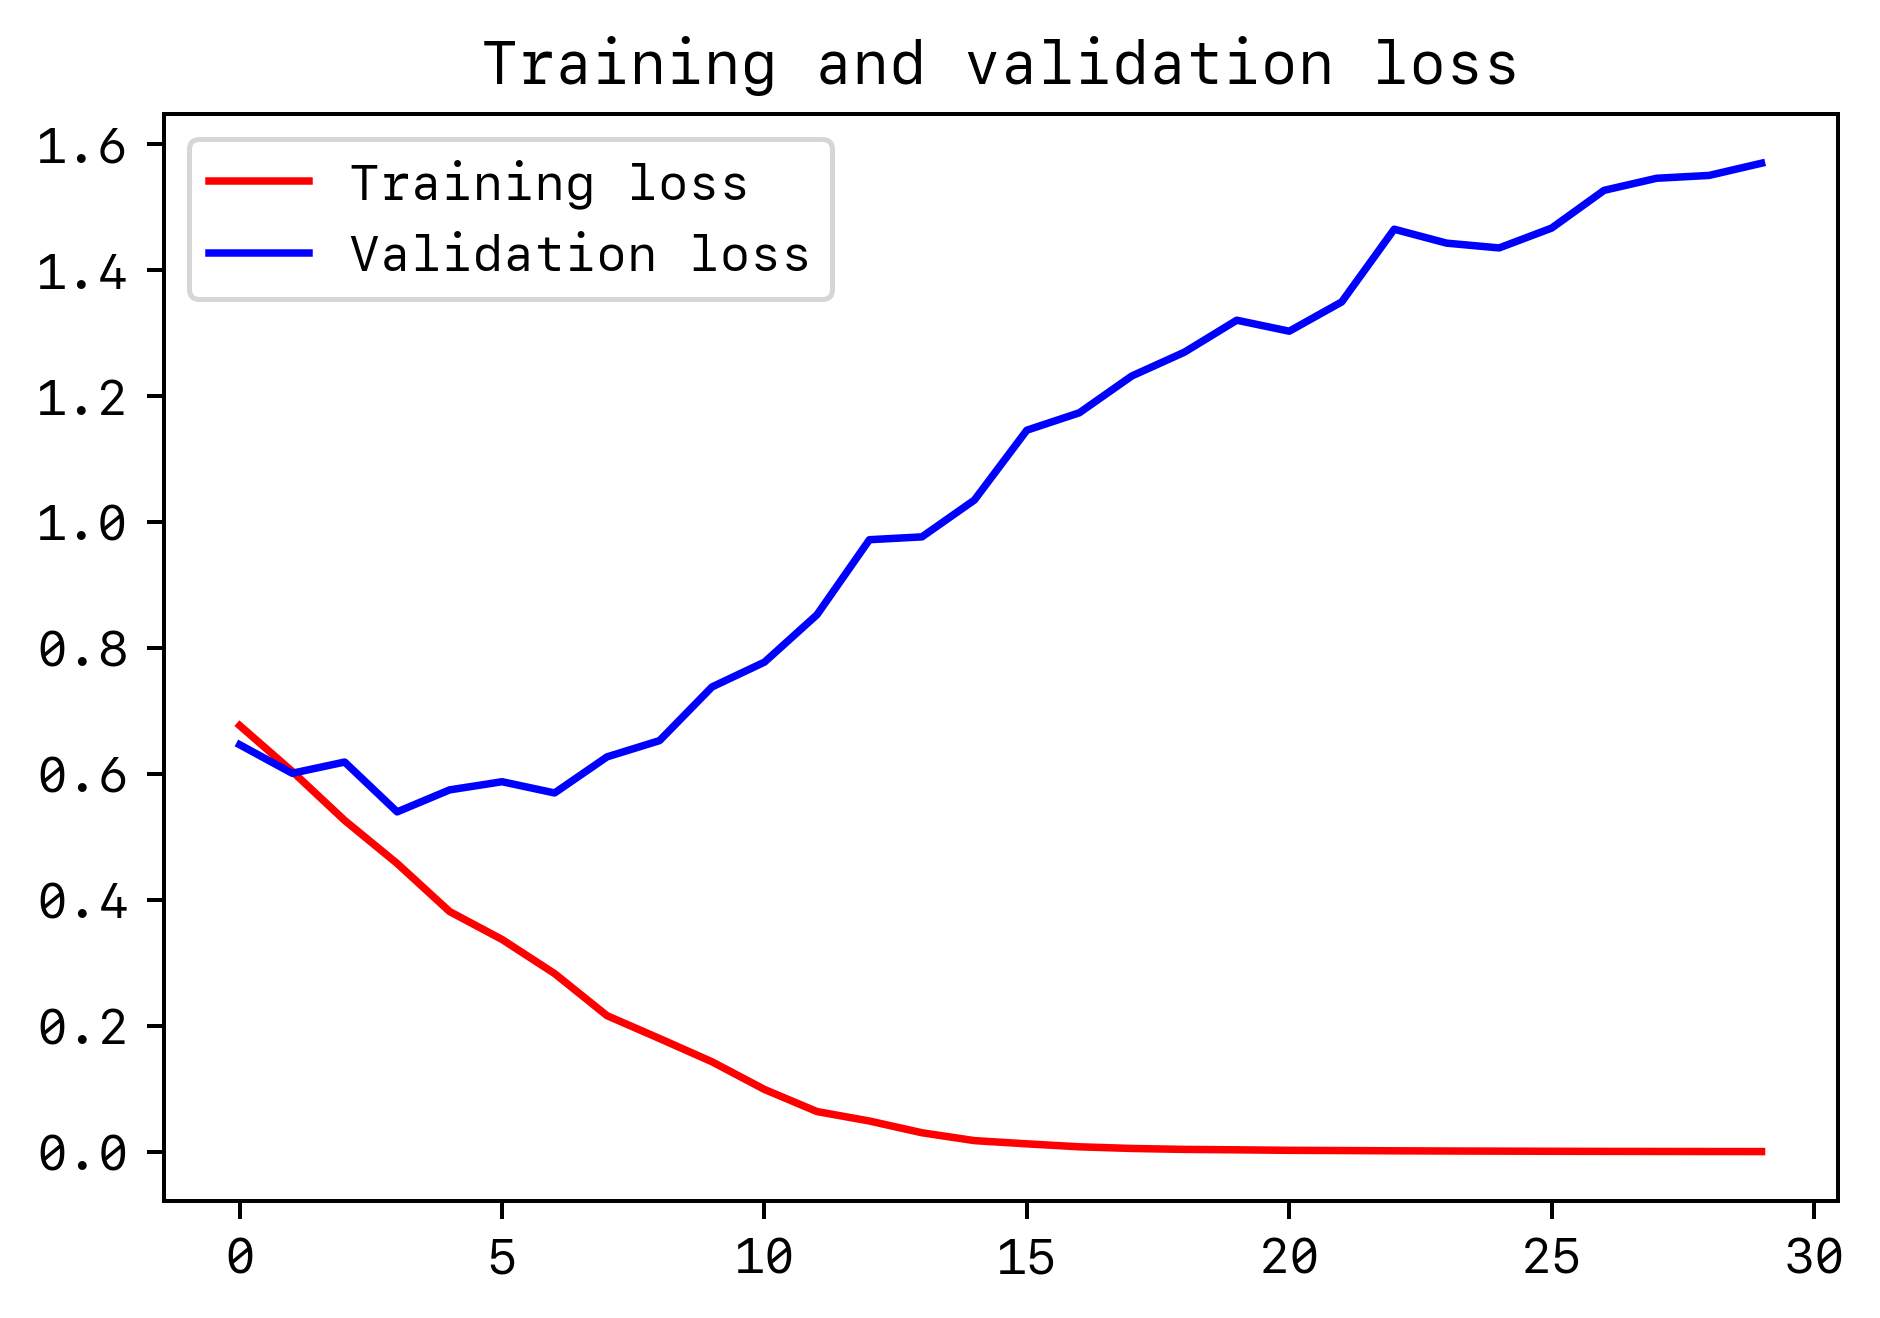

In [48]:
#用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SF Mono']
#用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 360  #图片像素
plt.rcParams['figure.dpi'] = 360  #分辨率

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', color='red', label='Training acc')
plt.plot(epochs, val_acc, 'b', color='blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', color='red', label='Training loss')
plt.plot(epochs, val_loss, 'b', color='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [49]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

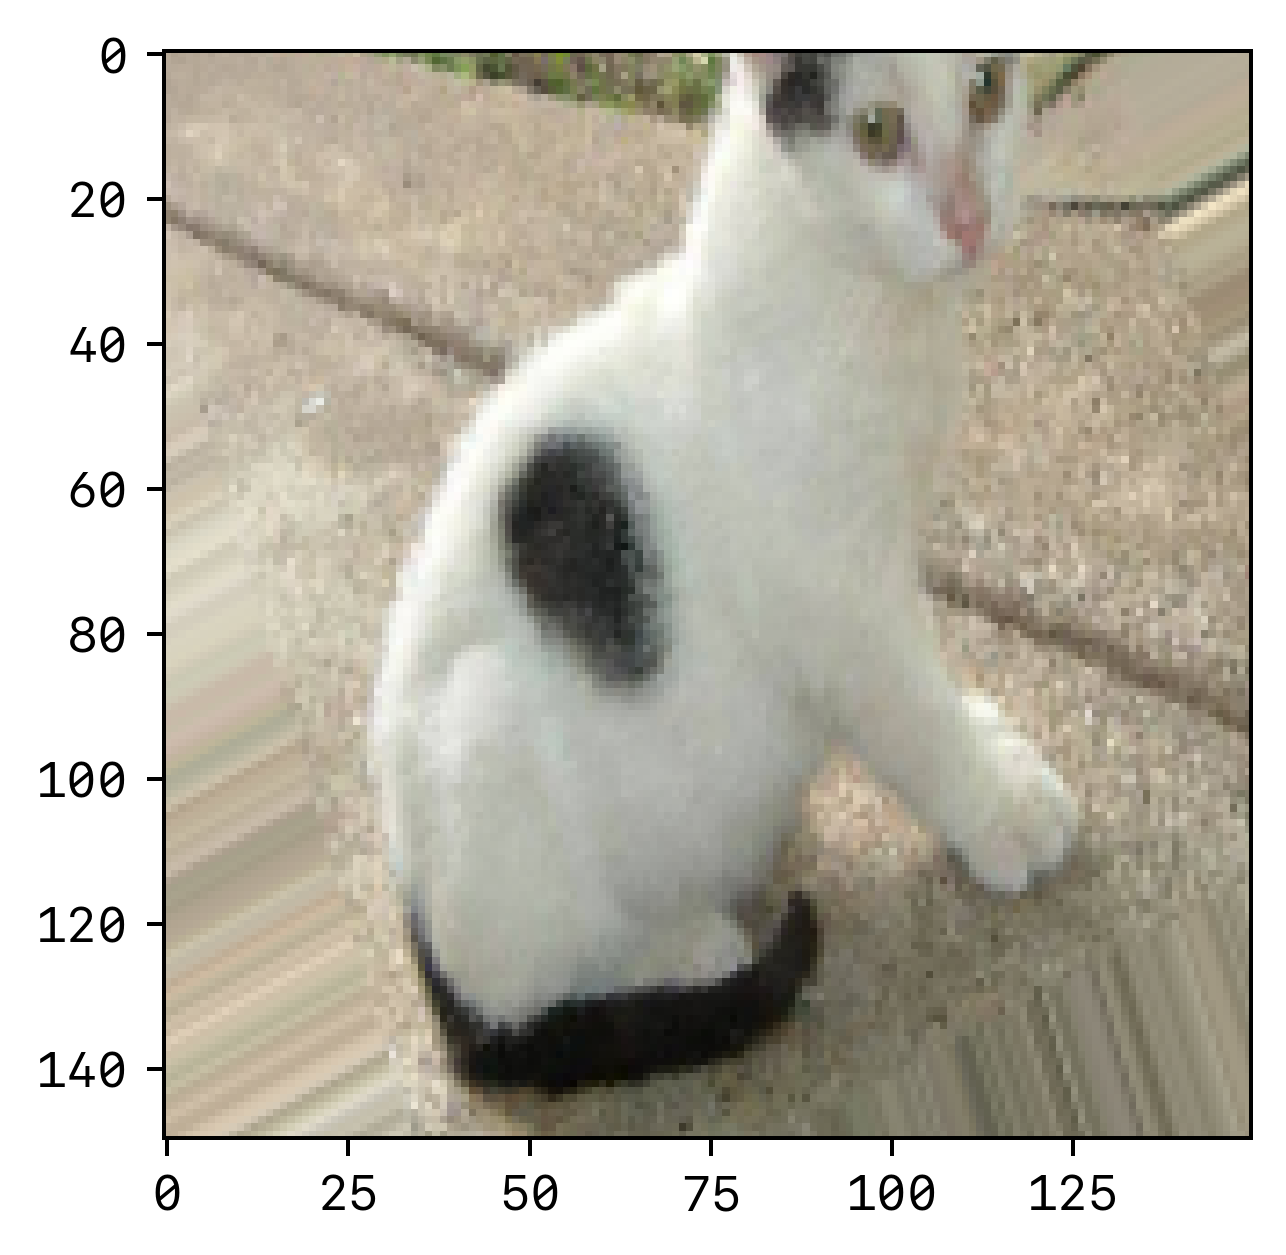

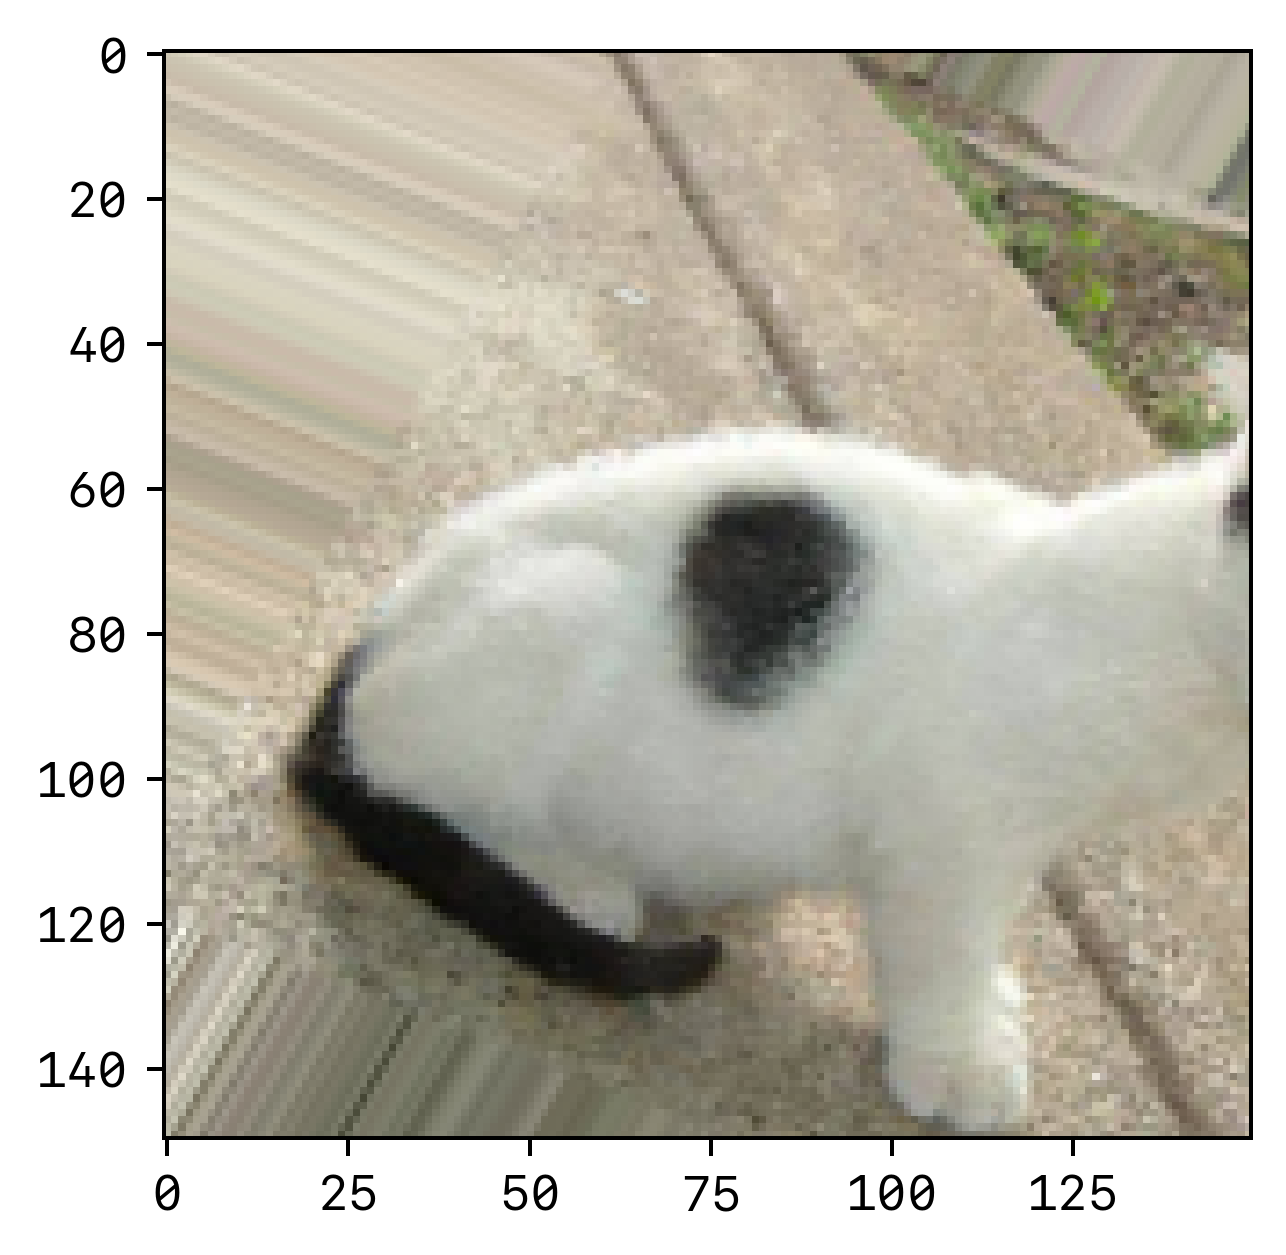

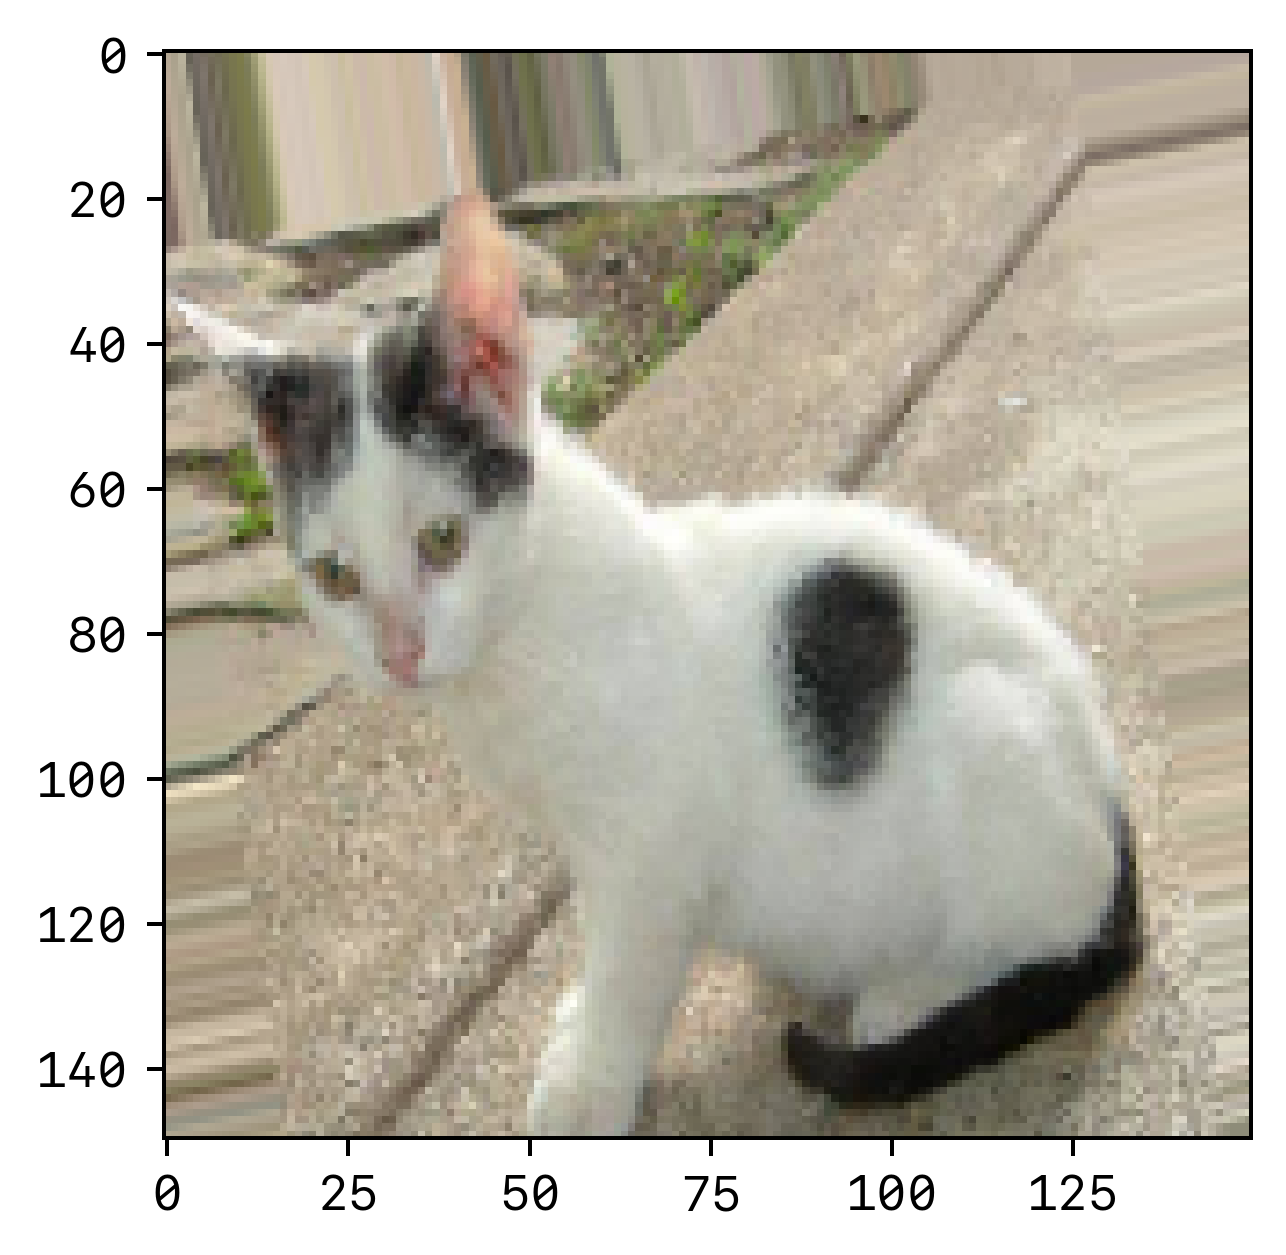

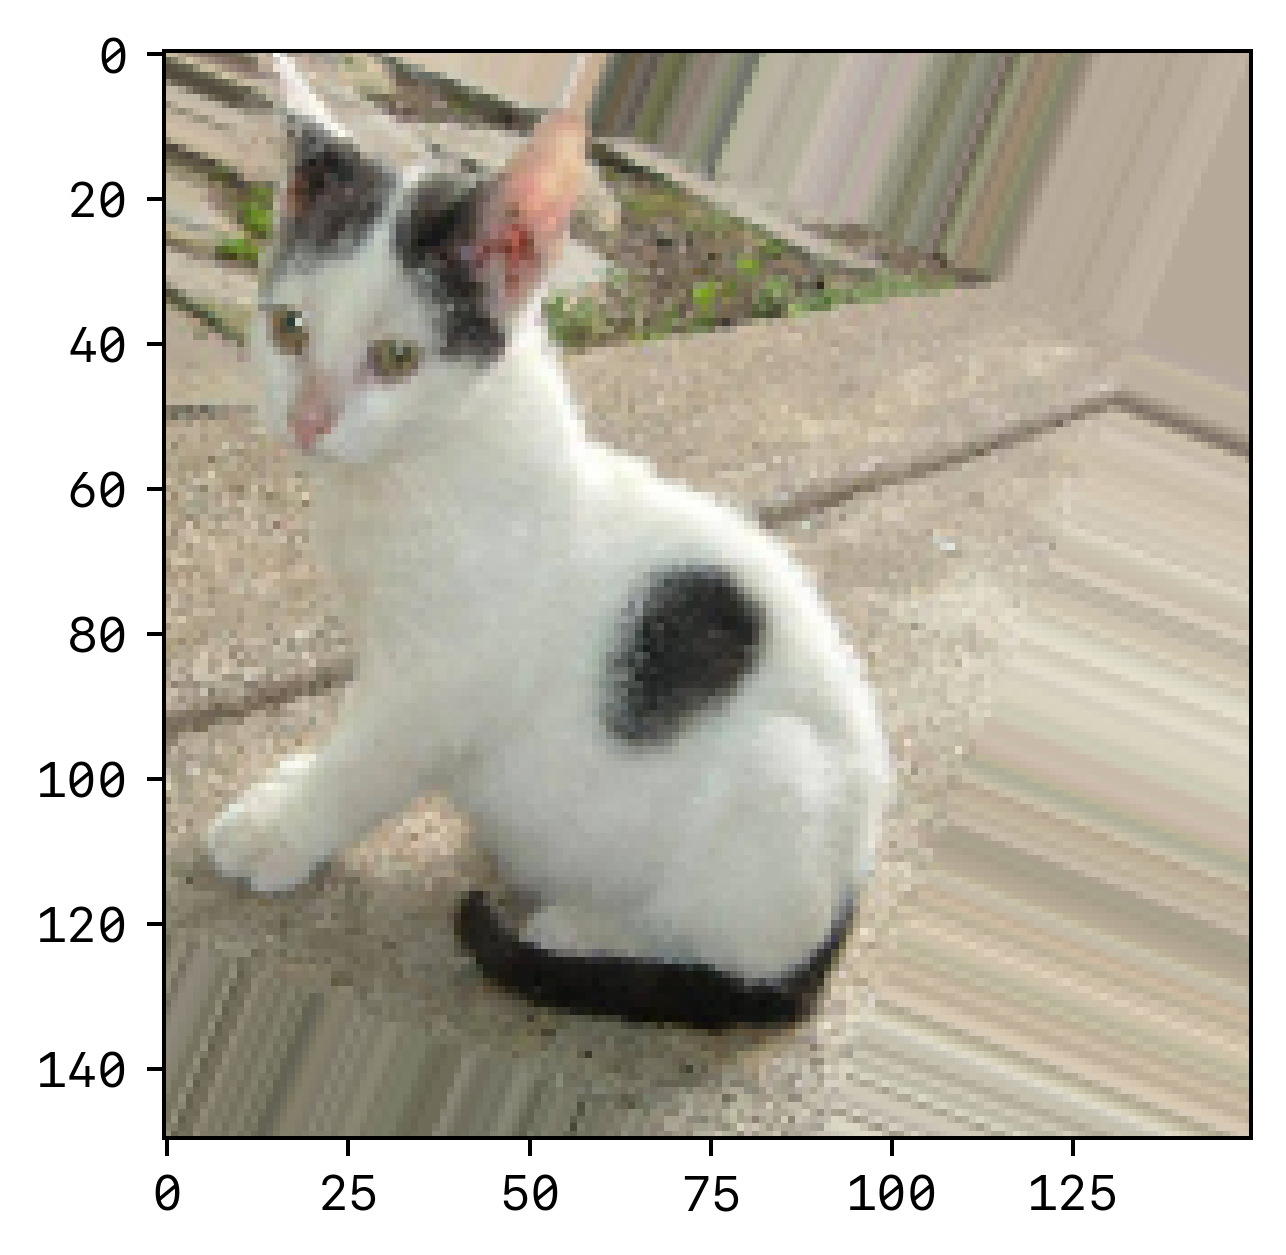

In [51]:
fname_enhance = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fname_enhance[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [52]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
___________________________

In [54]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])

In [55]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# 不能增强验证集
test_datagen = ImageDataGenerator(rescale=1. / 255)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/35
100/100 [==============================] - 71s 713ms/step - loss: 0.4376 - acc: 0.7906 - val_loss: 0.4412 - val_acc: 0.7970

/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-

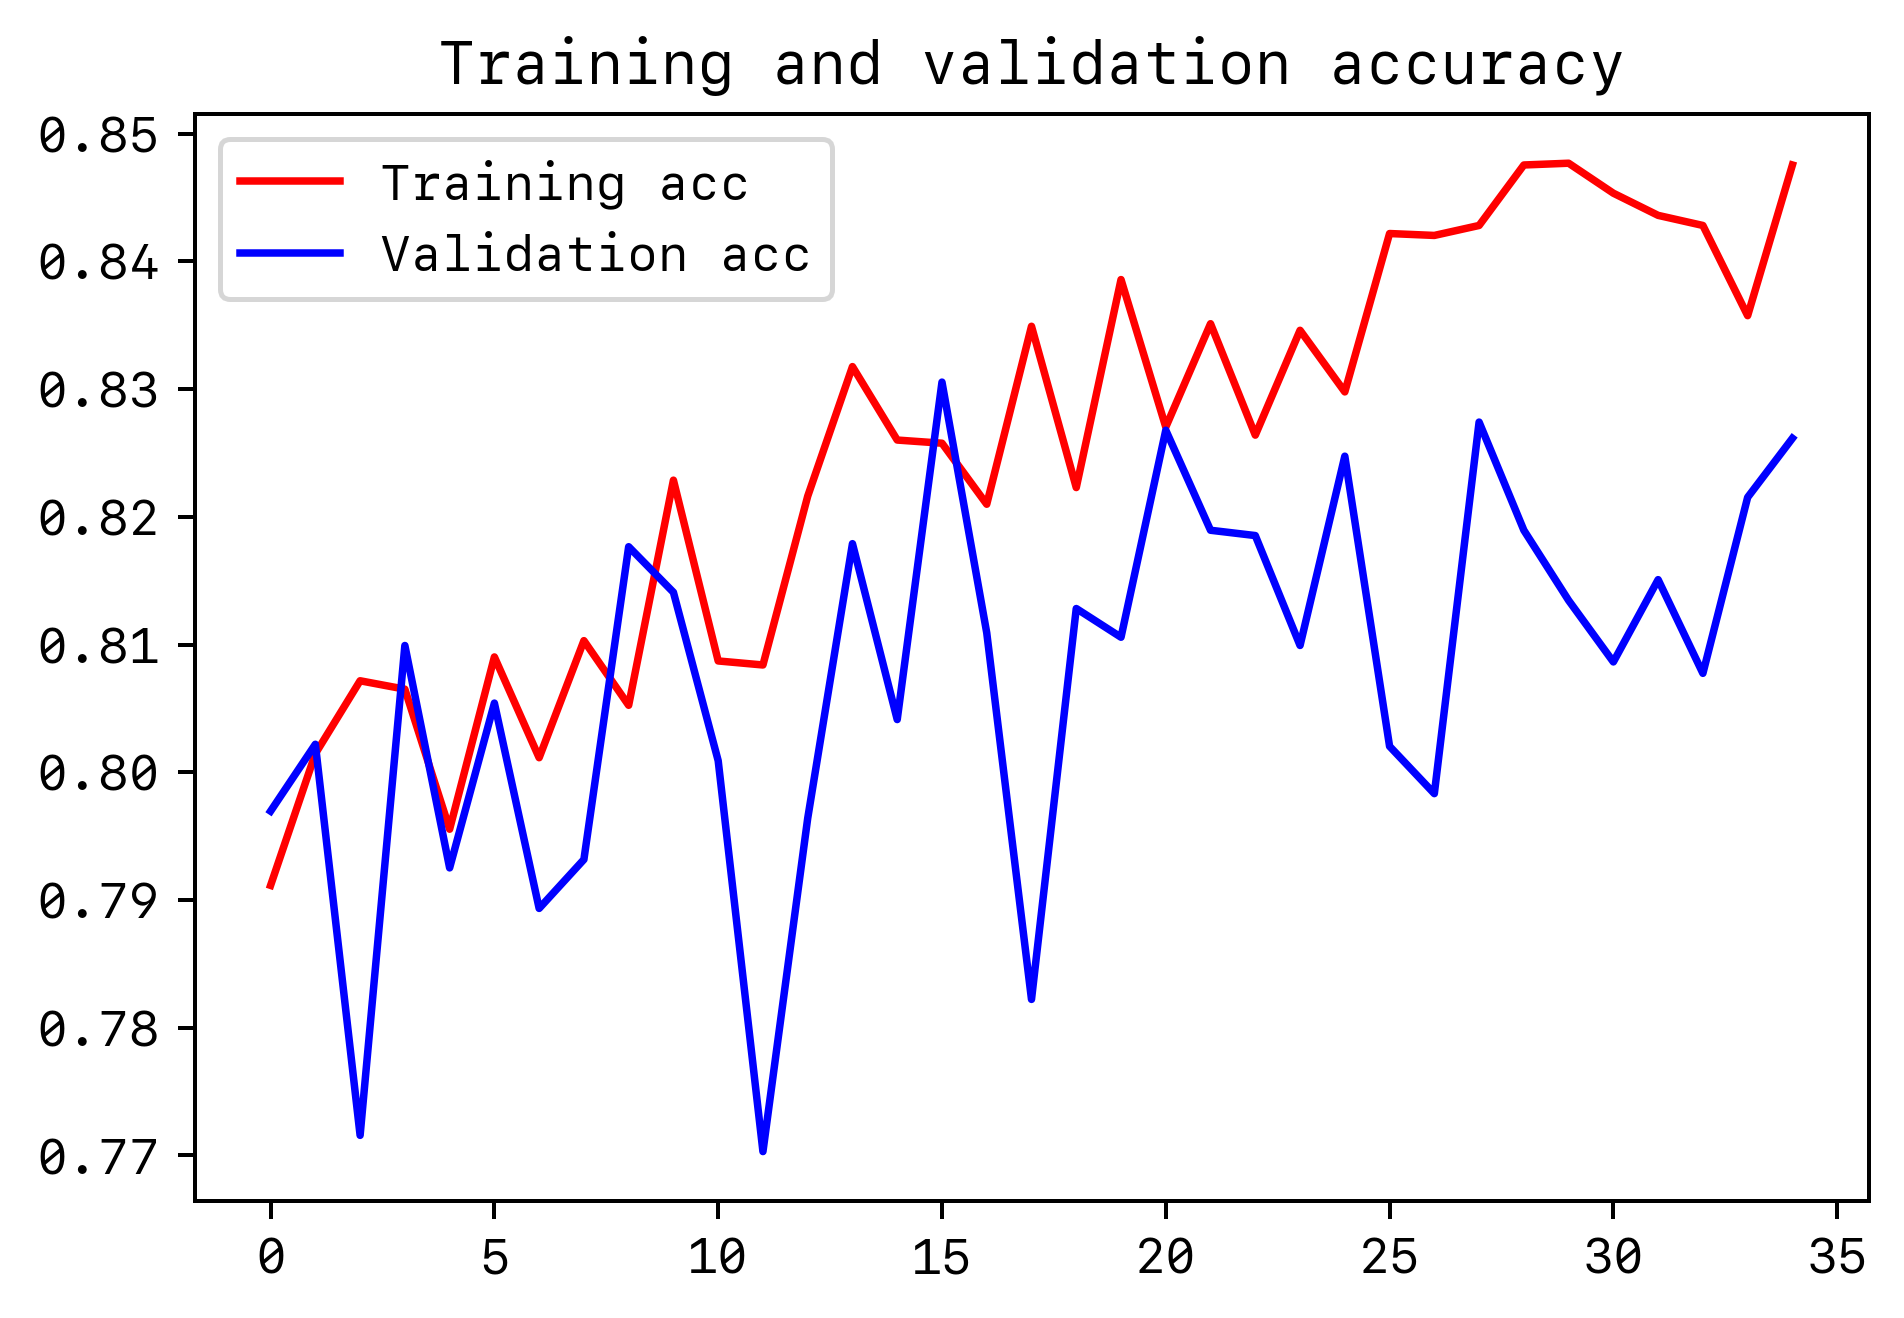

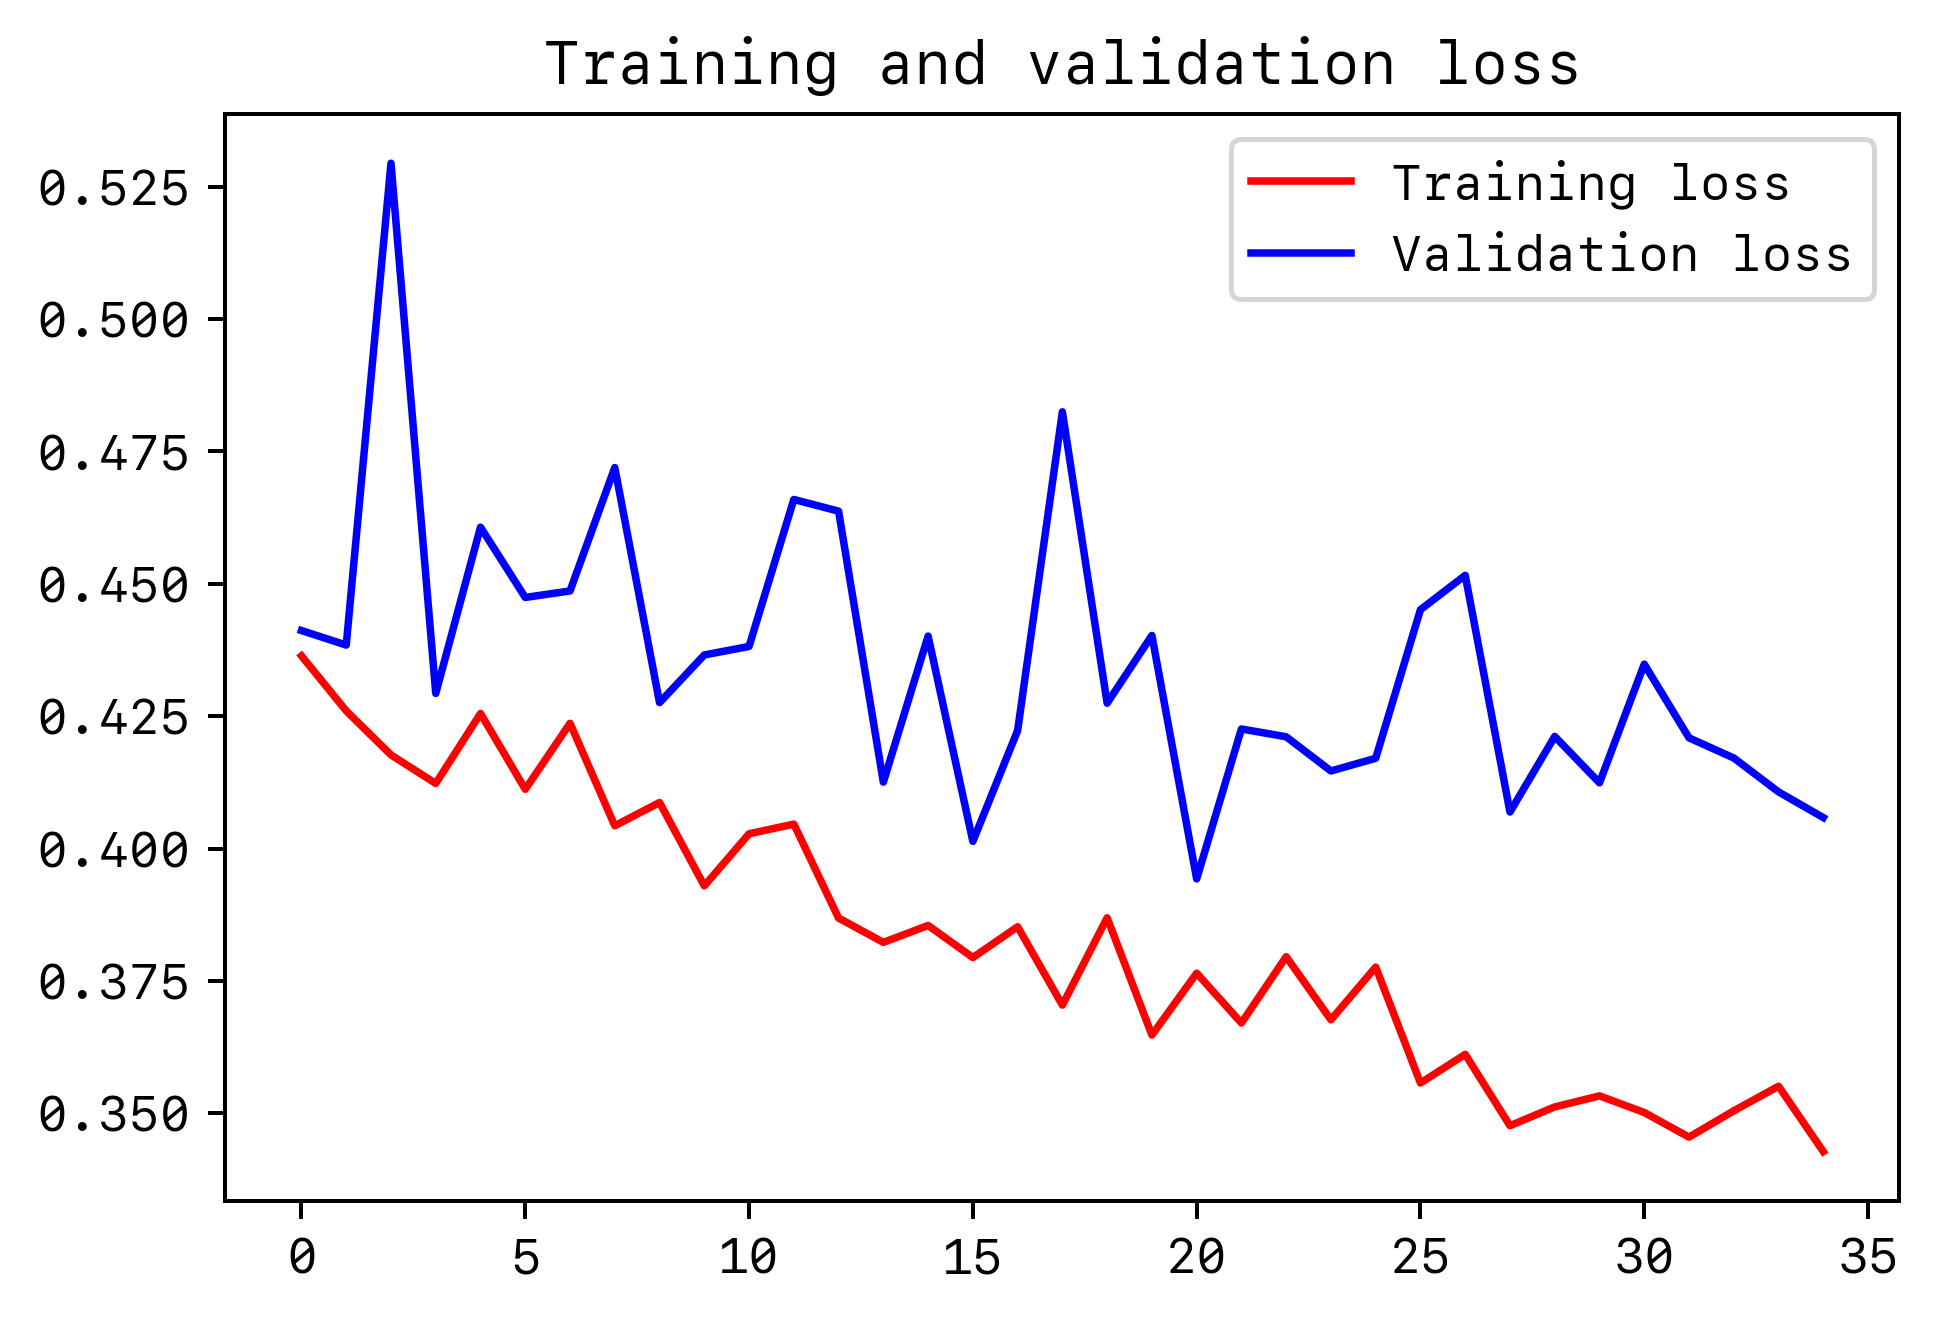

In [57]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  #目标目录
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=35,
    validation_data=validation_generator,
    validation_steps=50,
)

model.save('../models/cats_and_dogs/cats_and_dogs_small_2.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', color='red', label='Training acc')
plt.plot(epochs, val_acc, 'b', color='blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', color='red', label='Training loss')
plt.plot(epochs, val_loss, 'b', color='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()